In [1]:
# For Twitter API interactions:
#  install tweepy package; along the way, install wordcloud (will be used in this task)
# In terminal:
#  conda install -c conda-forge tweepy wordcloud
#
# Alternatively, right here in the notebook (uncomment the next two lines and run):
#import sys
#!conda install -c conda-forge --yes --prefix {sys.prefix} tweepy wordcloud

In [2]:
# Save "config_twitter.py" file in your working folder:
#  https://raw.githubusercontent.com/multidis/hult-social-media-analytics/main/task_twitter/config_twitter.py
#
# Collect your Twitter developer access tokens as described in the course module,
#  "Generating Twitter developer access tokens" page
#
# Edit "config_twitter.py" entering your keys/tokens in the respective assignment statements (instead of "todo").
# Then proceed with the cells below.

In [1]:
import tweepy as tw
import config_twitter

from PIL import Image
import numpy as np

In [2]:
# establish Twitter API connection
auth = tw.OAuthHandler(config_twitter.consumer_key, config_twitter.consumer_secret)
auth.set_access_token(config_twitter.access_token, config_twitter.access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [3]:
# returns False if credentials could not be verified, otherwise a user-object
# https://docs.tweepy.org/en/stable/api.html#API.verify_credentials
user = api.verify_credentials()
user

User(_api=<tweepy.api.API object at 0x00000246DA2F6AC0>, _json={'id': 1383509964661039117, 'id_str': '1383509964661039117', 'name': 'Paweerisa Patibut', 'screen_name': 'PPatibut', 'location': '', 'description': '', 'url': None, 'entities': {'description': {'urls': []}}, 'protected': False, 'followers_count': 0, 'friends_count': 1, 'listed_count': 0, 'created_at': 'Sat Apr 17 19:57:49 +0000 2021', 'favourites_count': 0, 'utc_offset': None, 'time_zone': None, 'geo_enabled': False, 'verified': False, 'statuses_count': 0, 'lang': None, 'contributors_enabled': False, 'is_translator': False, 'is_translation_enabled': False, 'profile_background_color': 'F5F8FA', 'profile_background_image_url': None, 'profile_background_image_url_https': None, 'profile_background_tile': False, 'profile_image_url': 'http://pbs.twimg.com/profile_images/1383510418270818304/Mb5ITlO0_normal.jpg', 'profile_image_url_https': 'https://pbs.twimg.com/profile_images/1383510418270818304/Mb5ITlO0_normal.jpg', 'profile_link

In [4]:
# Collect relevant tweets through the Twitter API.
import json
import tweepy as tw

In [5]:
# IMPORTANT: enter proper access credential in config_twitter.py file
import config_twitter

In [6]:
# function to establish an initial API connection, respecting the rate limit
def connect_api_client():
    auth = tw.OAuthHandler(config_twitter.consumer_key, config_twitter.consumer_secret)
    auth.set_access_token(config_twitter.access_token, config_twitter.access_token_secret)
    # https://docs.tweepy.org/en/stable/getting_started.html#api
    api = tw.API(auth, wait_on_rate_limit=True)
    try:
        # returns False if credentials could not be verified
        # https://docs.tweepy.org/en/stable/api.html#API.verify_credentials
        api.verify_credentials()
        user = api.verify_credentials()
        if not user:
            raise("Credentials could not be verified: Please check config.py")
        print(f"Connected to Twitter API as {user.name}")
    except Exception as e:
        raise e
    return api

In [7]:
api = connect_api_client()

Connected to Twitter API as Paweerisa Patibut


In [8]:
# construct a search query -- keywords #Q2
query = 'luxury cars OR "world-class car" OR "expensive car" -filter:retweets'

In [9]:
# decide how many tweets to query
###TODO increase this value later to collect a good dataset (try 2000 for instance)
ntweets = 2000

In [10]:
# search and collect relevant tweets
# https://docs.tweepy.org/en/stable/cursor_tutorial.html
# https://docs.tweepy.org/en/stable/code_snippet.html
tweets = [tweet._json for tweet in tw.Cursor(api.search, q=query, lang="en", tweet_mode='extended').items(ntweets)] #Q3
len(tweets)

2000

In [11]:
# example tweet content (json structure)
tweets[4]

{'created_at': 'Thu Jul 22 12:10:31 +0000 2021',
 'id': 1418181661439713280,
 'id_str': '1418181661439713280',
 'full_text': 'With the HAVAL H9, luxury comes as standard. Enjoy a vista-view of the world under the panoramic sunroof and relax in the massaging Comfort-Tek front seats.\n\nBook a test drive today - https://t.co/a6R6JYbWQp \n\n#gwm #haval #haval6 #haval2 #haval9 #cars #usedcars #blacktown https://t.co/KRBHXr9n21',
 'truncated': False,
 'display_text_range': [0, 272],
 'entities': {'hashtags': [{'text': 'gwm', 'indices': [210, 214]},
   {'text': 'haval', 'indices': [215, 221]},
   {'text': 'haval6', 'indices': [222, 229]},
   {'text': 'haval2', 'indices': [230, 237]},
   {'text': 'haval9', 'indices': [238, 245]},
   {'text': 'cars', 'indices': [246, 251]},
   {'text': 'usedcars', 'indices': [252, 261]},
   {'text': 'blacktown', 'indices': [262, 272]}],
  'symbols': [],
  'user_mentions': [],
  'urls': [{'url': 'https://t.co/a6R6JYbWQp',
    'expanded_url': 'https://bit.ly/3ph

In [12]:
# save tweets data to json file
file_out = f"raw_tweet_data_{ntweets}.json"
with open(file_out, mode='w') as f:
    f.write(json.dumps(tweets, indent=2))

In [13]:
# Twitter data analysis task starter.
import html
import json
import string
import re
from nltk import word_tokenize
from nltk.corpus import stopwords
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
# First collect the data in json-file; specify file name here (adjust the number as queried)
fjson = 'raw_tweet_data_2000.json'

In [15]:
# read json file with tweets data
# https://docs.python.org/3/tutorial/inputoutput.html#reading-and-writing-files
with open(fjson) as file:
    data = json.load(file)
len(data)

2000

In [16]:
# create pandas dataframe from tweet text content
# https://stackoverflow.com/a/43175477
df_tweets = pd.DataFrame([t['full_text'] for t in data], columns=['text'])
df_tweets

,text
0,The electric vehicle value proposition remains...
1,"@joshnizzy Watches, yes. Cars, maybe. \nWatche..."
2,@MCRCycleSam Looks like a dodge to create a so...
3,@FormerlyCBM air conditioning and air bags wer...
4,"With the HAVAL H9, luxury comes as standard. E..."
...,...
1995,@MissGoElectric @Tesla @GoodCarBadCar I always...
1996,Unleash the beast of your choice with Blue sha...
1997,"Make Your Dream car a reality with Blue Shark,..."
1998,Have a look at our Retro Player Car Air Freshe...


In [17]:
# tweet data record example: as documented for the Twitter API
# https://developer.twitter.com/en/docs/twitter-api/v1/data-dictionary/object-model/tweet
data[0]

{'created_at': 'Thu Jul 22 12:34:09 +0000 2021',
 'id': 1418187609847836679,
 'id_str': '1418187609847836679',
 'full_text': 'The electric vehicle value proposition remains murky: Beyond helping the planet, is there a net gain for YOU - the customer? Yes, but only if you add the "bragging value." No surprise that luxury cars such as Mercedes are toeing the Tesla line (https://t.co/wN3eH80Q36).',
 'truncated': False,
 'display_text_range': [0, 270],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [{'url': 'https://t.co/wN3eH80Q36',
    'expanded_url': 'https://bloom.bg/3Bre9gC',
    'display_url': 'bloom.bg/3Bre9gC',
    'indices': [245, 268]}]},
 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'},
 'source': '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>',
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'in_reply_to_screen_name': N

In [18]:
# add selected columns from tweet data fields
df_tweets['retweets'] = [t['retweet_count'] for t in data]
df_tweets['favorites'] = [t['favorite_count'] for t in data]
df_tweets['user'] = [t['user']['screen_name'] for t in data]
df_tweets

,text,retweets,favorites,user
0,The electric vehicle value proposition remains...,0,0,VenWise
1,"@joshnizzy Watches, yes. Cars, maybe. \nWatche...",0,0,biggirther
2,@MCRCycleSam Looks like a dodge to create a so...,0,7,ShowMeASignBryn
3,@FormerlyCBM air conditioning and air bags wer...,0,2,NealSilvester
4,"With the HAVAL H9, luxury comes as standard. E...",0,0,BTCityGwmhaval
...,...,...,...,...
1995,@MissGoElectric @Tesla @GoodCarBadCar I always...,0,0,Ringoffive
1996,Unleash the beast of your choice with Blue sha...,0,1,SharkRent
1997,"Make Your Dream car a reality with Blue Shark,...",0,1,SharkRent
1998,Have a look at our Retro Player Car Air Freshe...,0,0,CarhqA


In [19]:
# text cleaning function: see prior class modules
stop_words = set(stopwords.words('english'))

# strictly speaking, this is a closure: uses a wider-scope variable stop_words
# (disregard this note if you are a Python beginner)
def text_cleanup(s):
    s_unesc = html.unescape(re.sub(r"http\S+", "", re.sub('\n+', ' ', s)))
    s_noemoji = s_unesc.encode('ascii', 'ignore').decode('ascii')
    # normalize to lowercase and tokenize
    wt = word_tokenize(s_noemoji.lower())
    
    # filter word-tokens
    wt_filt = [w for w in wt if (w not in stop_words) and (w not in string.punctuation) and (w.isalnum())]
    
    # return clean string
    return ' '.join(wt_filt)

In [20]:
# add clean text column
# NOTE: apply in pandas applies a function to each element of the selected column
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html
df_tweets['text_clean'] = df_tweets['text'].apply(text_cleanup)
df_tweets

,text,retweets,favorites,user,text_clean
0,The electric vehicle value proposition remains...,0,0,VenWise,electric vehicle value proposition remains mur...
1,"@joshnizzy Watches, yes. Cars, maybe. \nWatche...",0,0,biggirther,joshnizzy watches yes cars maybe watches inves...
2,@MCRCycleSam Looks like a dodge to create a so...,0,7,ShowMeASignBryn,mcrcyclesam looks like dodge create socially e...
3,@FormerlyCBM air conditioning and air bags wer...,0,2,NealSilvester,formerlycbm air conditioning air bags found lu...
4,"With the HAVAL H9, luxury comes as standard. E...",0,0,BTCityGwmhaval,haval h9 luxury comes standard enjoy world pan...
...,...,...,...,...,...
1995,@MissGoElectric @Tesla @GoodCarBadCar I always...,0,0,Ringoffive,missgoelectric tesla goodcarbadcar always wond...
1996,Unleash the beast of your choice with Blue sha...,0,1,SharkRent,unleash beast choice blue shark premium luxury...
1997,"Make Your Dream car a reality with Blue Shark,...",0,1,SharkRent,make dream car reality blue shark hire premium...
1998,Have a look at our Retro Player Car Air Freshe...,0,0,CarhqA,look retro player car air freshener car cars c...


In [21]:
# sentiment analysis
def sentim_polarity(s):
    return TextBlob(s).sentiment.polarity

def sentim_subject(s):
    return TextBlob(s).sentiment.subjectivity

df_tweets['polarity'] = df_tweets['text_clean'].apply(sentim_polarity)
df_tweets['subjectivity'] = df_tweets['text_clean'].apply(sentim_subject)
df_tweets

,text,retweets,favorites,user,text_clean,polarity,subjectivity
0,The electric vehicle value proposition remains...,0,0,VenWise,electric vehicle value proposition remains mur...,0.000000,0.000000
1,"@joshnizzy Watches, yes. Cars, maybe. \nWatche...",0,0,biggirther,joshnizzy watches yes cars maybe watches inves...,-0.200000,0.900000
2,@MCRCycleSam Looks like a dodge to create a so...,0,7,ShowMeASignBryn,mcrcyclesam looks like dodge create socially e...,0.272222,0.466667
3,@FormerlyCBM air conditioning and air bags wer...,0,2,NealSilvester,formerlycbm air conditioning air bags found lu...,0.000000,0.000000
4,"With the HAVAL H9, luxury comes as standard. E...",0,0,BTCityGwmhaval,haval h9 luxury comes standard enjoy world pan...,0.200000,0.250000
...,...,...,...,...,...,...,...
1995,@MissGoElectric @Tesla @GoodCarBadCar I always...,0,0,Ringoffive,missgoelectric tesla goodcarbadcar always wond...,0.000000,0.000000
1996,Unleash the beast of your choice with Blue sha...,0,1,SharkRent,unleash beast choice blue shark premium luxury...,0.000000,0.100000
1997,"Make Your Dream car a reality with Blue Shark,...",0,1,SharkRent,make dream car reality blue shark hire premium...,0.000000,0.100000
1998,Have a look at our Retro Player Car Air Freshe...,0,0,CarhqA,look retro player car air freshener car cars c...,0.450000,0.700000


In [22]:
# define the list of brands to analyze, consistent with the search topic
#  for which the tweets were collected
brands = ['audi', 'benz', 'bmw', 'lexus', 'volvo', 'porsche', 'tesla'] #Q4

In [56]:
# start a brand comparison dataframe
df_brands = pd.DataFrame(brands, columns=['brand'])
df_brands

,brand
0,audi
1,benz
2,bmw
3,lexus
4,volvo
5,porsche
6,tesla


In [57]:
# example: tweet subset mentioning a given brand
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.contains.html
df_tweets[df_tweets['text_clean'].str.contains("volvo")]

,text,retweets,favorites,user,text_clean,polarity,subjectivity
562,"Next-Gen Volvos Will Include LiDAR as Standard, Offer ‘Unsupervised’ Automated Driving. https://t.co/FPgWeZS8Gr\n\n#executive #business #work #luxury #ceo #like #entrepreneur #sales #cars #boss #affordable #autosale #ambition #professional #autoshow #InvestmentCapitalGrowth https://t.co/S9LPBRFjdX",1,0,clifflocks,volvos include lidar standard offer unsupervised automated driving executive business work luxury ceo like entrepreneur sales cars boss affordable autosale ambition professional autoshow investmentcapitalgrowth,0.050000,0.050000
741,Luxury at your fingertips: Buying your next Volvo car is only too easy at Volvo Cars of Exeter! https://t.co/MymK0Pnil2,0,0,VolvoCarsExeter,luxury fingertips buying next volvo car easy volvo cars exeter,0.216667,0.416667
870,"And the world's luxury automakers are also getting in on the action: ""Jaguar plans to sell only electric cars from 2025, Volvo from 2030 and [recently] the British sportscar company Lotus said it would follow suit, selling only electric models from 2028",0,0,Kythra2,world luxury automakers also getting action jaguar plans sell electric cars 2025 volvo 2030 recently british sportscar company lotus said would follow suit selling electric models 2028,0.050000,0.050000
892,The 2020 Volvo XC90 Luxury Hybrid Has It All - A Girl's Guide to Cars https://t.co/GbKkjwgtF0,0,0,prontobody,2020 volvo xc90 luxury hybrid girl guide cars,0.000000,0.000000
979,"Next-Gen Volvos Will Include LiDAR as Standard, Offer ‘Unsupervised’ Automated Driving. https://t.co/urn4Y19vON\n\n#executive #business #work #luxury #ceo #like #entrepreneur #sales #cars #boss #affordable #autosale #ambition #professional #autoshow #InvestmentCapitalGrowth https://t.co/4SS7Xzl8FJ",0,0,ICGrowth,volvos include lidar standard offer unsupervised automated driving executive business work luxury ceo like entrepreneur sales cars boss affordable autosale ambition professional autoshow investmentcapitalgrowth,0.050000,0.050000
1030,"@SamTwits @elonmusk Same here...\n I have always driven luxury Volvo Cars, but my Tesla is so much better at all levels!\n🤩 Incredible job!",0,1,Johan__Vroonen,samtwits elonmusk always driven luxury volvo cars tesla much better levels incredible job,0.700000,0.700000
1226,"@volvocars has come a long way with the designs of its cars. The XC90 is the epitome of luxury and safety. \n\nLove the features - they even have an option for a seat 💺 that can massage you… \n\nNB: I have never driven a Volvo, only watched reviews https://t.co/ivYS7JweIN",0,0,ShoeshoeQhu,volvocars come long way designs cars xc90 epitome luxury safety love features even option seat massage nb never driven volvo watched reviews,0.225000,0.500000
1271,#luxury cars retail sales report #june2021 \n.\n.\n@autotechlite 👈👈👈🇮🇳🇮🇳🇮🇳 follow our page for more amazing content\n.\n.\n#mercedesclub #mercedeslife #bmw #bmwluxury #luxurycarlife #audi #audiindia #jlr #jaguar #landrover #volvo #porsche #bentley #lamborghini #rollsroyce #luxurycar https://t.co/BM5MsMTk8U,0,2,autotechlite,luxury cars retail sales report june2021 autotechlite follow page amazing content mercedesclub mercedeslife bmw bmwluxury luxurycarlife audi audiindia jlr jaguar landrover volvo porsche bentley lamborghini rollsroyce luxurycar,0.600000,0.900000
1402,"New car inventories are stunningly low, but you can still get a deal on some luxury cars and SUVs. Our top ten for July: https://t.co/UnUTyXA2gW @cadillac @buick @bmw @infiniti @volvo @lincoln @audi @genesis @lexus https://t.co/VXQTZ5SB3T",0,2,KelleyBlueBook,new car inventories stunningly low still get deal luxury cars suvs top ten july cadillac buick bmw infiniti volvo lincoln audi genesis lexus,0.159091,0.313636
1547,"We have a luxury range of vehicles such as, SUV’s and vans and modern shape vehicles. Our luxury fleet consists of brand such as Mercedes-Benz, BMW, Audi, Jaguar, Lexus, Chrysler, Genesis, Volvo. https://t.co/ns78USYWXT #chauffeu

In [58]:
# Reading the complete text

a = df_tweets[df_tweets['text'].str.contains("tesla")]['text']
pd.set_option("display.max_colwidth",-1)
a

<ipython-input-58-b259f5ef81b7>:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option("display.max_colwidth",-1)


84      @tesla_raj @elonmusk I would add ventilation + heating + massages like in luxury cars                                                                                                                                                                                                                                                            
150     @highandhealing @LeArielleSimone yep! its a lot with luxury cars, i've looked into it and teslas are probably the most profitable to rent out. i do see lots of fords and hondas on there as well! never used it myself however.                                                                                                                 
662     @ray4tesla @TaylorOgan I thought the flagship BYD Han is luxury category...\nhttps://t.co/qBiVmSU498                                                                                                                                                                                                        

In [59]:
# function to compute average sentiment of tweets mentioning a given brand
def brand_sentiment(b):
    return df_tweets[df_tweets['text_clean'].str.contains(b)]['polarity'].mean()

In [60]:
# brand sentiment comparison
df_brands['average_sentiment'] = df_brands['brand'].apply(brand_sentiment)
df_brands

,brand,average_sentiment
0,audi,0.192388
1,benz,0.142804
2,bmw,0.198615
3,lexus,0.205703
4,volvo,0.180916
5,porsche,0.173653
6,tesla,0.117128


In [61]:
# highest sentiment tweets
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html
df_tweets.sort_values(by='polarity', ascending=False).head(20) #Highest sentiment value Q5

,text,retweets,favorites,user,text_clean,polarity,subjectivity
104,aston martin is one of the best luxury brand of cars imo,0,1,tryingdrugs,aston martin one best luxury brand cars imo,1.00,0.30
346,@RepTroyNehls Liberal spending huh? How do you explain that Rolls Royce… had its best quarter… EVER… in 2020? https://t.co/Bdq41Nx9AI,0,0,BravoZu70956328,reptroynehls liberal spending huh explain rolls royce best quarter ever 2020,1.00,0.30
919,@Dishasatra Having kept all sort of cars( not boasting though). Best one to have is Toyota Innova crysta. Luxury has no dimensions though. But u will never repent buying this car.,0,1,dineshkasana,dishasatra kept sort cars boasting though best one toyota innova crysta luxury dimensions though u never repent buying car,1.00,0.30
1051,"Compare rates and polices [best car insurance companies for luxury cars] in (MA OH TX CT VA SC NM NH RI ME) with a ""Premier Shield Auto Insurance #Agent"" for #LuxuryCarInsurance\n\nhttps://t.co/gqisqaiXeA\n\n#Tesla #Audi #Lexus #BMW #MercedesBenz #LandRover #Acura #Jaguar #Cadillac https://t.co/QTq57KJbIf",1,3,HomeAutoAgent,compare rates polices best car insurance companies luxury cars oh tx ct va sc nm nh ri premier shield auto insurance agent luxurycarinsurance tesla audi lexus bmw mercedesbenz landrover acura jaguar cadillac,1.00,0.30
271,"Be it for work or for pleasure, we always have you covered.\n\nWe have excellent car options to cater to all your travel requirements - at all times of the day.\n\nDownload the app:\nhttps://t.co/k84LdqOnF5\n\n#CarWithDriver #Kolkata #PrivateTaxi #OutstationCab\n\n#Taxi #Luxury https://t.co/N4qeZeYtiK",0,0,neo_cars,work pleasure always covered excellent car options cater travel requirements times day download app carwithdriver kolkata privatetaxi outstationcab taxi luxury,1.00,1.00
1161,Best Luxury Cars – Luxury Adviser https://t.co/AoiUi4PQoC https://t.co/sPixgSjwD2,0,0,GBAFReview,best luxury cars luxury adviser,1.00,0.30
1020,"I refuse to give A.C.E nothing but the best. If I had thousands of dollars to spend on them I'd do it. I'd buy them a luxury apartment, I'd buy them cars, I'd give them anything if I could. They deserve to be spoiled. https://t.co/oGTpS8IE29",0,3,bkismyangel,refuse give nothing best thousands dollars spend buy luxury apartment buy cars give anything could deserve spoiled,1.00,0.30
1348,Best Luxury Cars – Luxury Adviser https://t.co/AoiUi4PQoC https://t.co/CIMqcFAmdc,0,0,GBAFReview,best luxury cars luxury adviser,1.00,0.30
636,"Parking in a row may be a nightmare. \n\nSo, if you despise parking, here are our best selections for self-parking SUVs on the market today that won't break the bank.\n\nhttps://t.co/9km3lbMGM4\n\n#suv #cars #bmw #luxury #performance #australia #lifestyle #travel #car #sports #bimmer",0,1,MatcherMotor,parking row may nightmare despise parking best selections suvs market today wo break bank suv cars bmw luxury performance australia lifestyle travel car sports bimmer,1.00,0.30
993,Best Luxury Cars – Luxury Adviser https://t.co/AoiUi4PQoC https://t.co/V3i4Ps7bQk,0,0,GBAFReview,best luxury cars luxury adviser,1.00,0.30


In [62]:
# highest sentiment tweets
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html
df_tweets.sort_values(by='polarity', ascending=True).head(20) #Lowest sentiment value Q5

,text,retweets,favorites,user,text_clean,polarity,subjectivity
1244,@AshishmishraAd @INCIndia Bullshitt Wearing airpod and Luxury cars appearing once in 3 month's and disappear makes you feel like Mahathma Gandhi.....????? Pathetic Person's Bruuhhhh....,0,0,sathishkumarMGJ,ashishmishraad incindia bullshitt wearing airpod luxury cars appearing 3 month disappear makes feel like mahathma gandhi pathetic person bruuhhhh,-1.000000,1.000000
1905,Expect to see luxury cars in horrible accidents.,0,0,herrealegeaux,expect see luxury cars horrible accidents,-1.000000,1.000000
1113,"@advocatemahere What a shame when our leaders buy luxury cars to drive on pathetic roads. One day they will be held accountable, if not on earth, in the life to come, kuna Mwari kudenga.\n#DemLoot\n#ResistDictatorship\n#RegisterToVoteZW",0,3,Vimbai34879137,advocatemahere shame leaders buy luxury cars drive pathetic roads one day held accountable earth life come kuna mwari kudenga demloot resistdictatorship registertovotezw,-1.000000,1.000000
489,People that drive luxury cars drive the fucking worst.,1,3,minimalmami,people drive luxury cars drive fucking worst,-1.000000,1.000000
1677,@MikewitthenikeS A bunch of idiots are going to show off their rented houses and leased/borrowed luxury cars.,0,2,blacknuyorican,mikewitthenikes bunch idiots going show rented houses luxury cars,-0.800000,0.800000
1213,@Ibra_Joudeh Why use a car made in a filthy NATO imperlialist country. Can't those anti-imperialists make their own luxury cars?,0,0,Jzefina75244569,use car made filthy nato imperlialist country ca make luxury cars,-0.800000,1.000000
1029,"@SARIYE_18 @OsheaJacksonJr @kanyewest Who cares. Luxury cars are for morons. Own the stock, never the product.",0,0,techlidbull,osheajacksonjr kanyewest cares luxury cars morons stock never product,-0.800000,1.000000
306,"Yall hate on anything expense because yall hate to see blacks in opulence. Birkins, Chanel, jewelry, luxury cars, cosmetic and plastic surgery were never a topic until blacks were doing it.",0,0,_kia_shar,yall hate anything expense yall hate see blacks opulence birkins chanel jewelry luxury cars cosmetic plastic surgery never topic blacks,-0.800000,0.900000
971,I miss living in California and just being stupid. I drove around Orange County in other peoples luxury cars and drank energy drinks all day with no perception of reality.,0,1,damnskippie,miss living california stupid drove around orange county peoples luxury cars drank energy drinks day perception reality,-0.800000,1.000000
21,"@Iron_Mtha @LMasheli @MissNthabeleng Loool,maybe anc should do the same with us instead of empowering few stupid connected elite who spend their money on slay queens,luxury alcohol,clothes,Cars and Dubai trips.",0,0,MDIMA64526158,lmasheli missnthabeleng loool maybe anc us instead empowering stupid connected elite spend money slay queens luxury alcohol clothes cars dubai trips,-0.800000,1.000000


In [63]:
# most retweeted content
df_tweets.sort_values(by='retweets', ascending=False).head(20) #Q6

,text,retweets,favorites,user,text_clean,polarity,subjectivity
545,"…it’s nothing but men being haters in the comments. Y’all really be upset when women, black women especially, pop out with things that y’all can’t afford and it makes y’all angry. Y’all do not be having this same energy when men post luxury cars, f*cking 1ncels. https://t.co/XQaonPf5c6",2397,12452,smoke_nd_pearlz,nothing men haters comments yall really upset women black women especially pop things yall cant afford makes yall angry yall energy men post luxury cars f cking 1ncels,-0.116667,0.658333
492,"Ferrari doesn't sell cars, they sell status.\n\nRolex doesn't sell watches, they sell luxury.\n\nNike doesn't sell shoes, they sell performance.\n\nLesson:\n\nDon't sell the product, sell the outcome.",286,1163,NickTheEcomGod,ferrari sell cars sell status rolex sell watches sell luxury nike sell shoes sell performance lesson sell product sell outcome,0.000000,0.000000
1943,"We’re not asking for a livable wage so we can buy luxury goods, mansions &amp; cars...we’re asking for a livable wage so we can afford to pay rent in our own cities or even dream of owning a home. Its like politicians &amp; lawmakers think we’re asking them to make us rich when we’re not",113,345,sfergs_,asking livable wage buy luxury goods mansions cars asking livable wage afford pay rent cities even dream owning home like politicians lawmakers think asking make us rich,0.375000,0.750000
309,This brand is known for its iconic bright red and fast luxury cars. It has recently announced plans to launch a fashion collection for men and women. Can you #Unscramble the name? #TataCrucible https://t.co/afdLseEeQ4,69,115,Tata_Crucible,brand known iconic bright red fast luxury cars recently announced plans launch fashion collection men unscramble name tatacrucible,0.280000,0.430000
538,"In a culture that effectively defines wealth by how much CO2 you emit (your number of luxury cars, size of your yacht, size of your private jet, your caribbean islands owned etc.), good old millionaire helicopter skiing just won‘t cut it anymore. https://t.co/Huj7Kod43t",69,240,wblau,culture effectively defines wealth much co2 emit number luxury cars size yacht size private jet caribbean islands owned etc good old millionaire helicopter skiing wont cut anymore,0.320000,0.435000
878,"A society that validly celebrates beautiful churches, mansions, luxury cars...BUT leaves its libraries, schools, hospitals, markets, parks, museums, WASTE MANAGEMENT SYSTEM, transportation system, WASH,... UNDERFUNDED, dilapidated, is facing a serious existential crisis in VALUES",67,103,julietkego,society validly celebrates beautiful churches mansions luxury cars leaves libraries schools hospitals markets parks museums waste management system transportation system wash underfunded dilapidated facing serious existential crisis values,0.105556,0.555556
1424,"Hey, Catholics attached to the traditional Latin Mass - just remember, that unlike ""Don Mercedes"" the priest who spent all the time he wasn't raping kids driving luxury cars to ""retreats""- what you're doing is a threat to the Church. Francis could forgive and restore him. Not you",64,355,michaelbd,hey catholics attached traditional latin mass remember unlike mercedes priest spent time raping kids driving luxury cars retreats threat church francis could forgive restore,-0.050000,0.425000
554,"#Rubiholics say #RahulVaidya is Poor and #DishaParmar is GD\n\nRKV- has 4 Posh flats, chopper, Luxury cars, paid 15-20 lakhs per concert.Endorsements\nDisha - Showers RKV with Luxury watches, Expensive gifts\n\nHey Parmeshwar. Mujhe bhi RKV jaisa gareeb aur Disha jaisi GD biwi de 🙏",59,89,Rohan78908,rubiholics say rahulvaidya poor dishaparmar gd 4 posh flats chopper luxury cars paid lakhs per disha showers rkv luxury watches expensive gifts hey parmeshwar mujhe bhi rkv jaisa gareeb aur disha jaisi gd biwi de,-0.450000,0.650000
600,"Enugu state has a water crisis. People are dying of cholera. A soc

In [64]:
# users producing most retweeted content #Q7
df_tweets.sort_values(by='retweets', ascending=False).head(20)['user']

545     smoke_nd_pearlz
492     NickTheEcomGod 
1943    sfergs_        
309     Tata_Crucible  
538     wblau          
878     julietkego     
1424    michaelbd      
554     Rohan78908     
600     julietkego     
1769    EmpireEd       
945     XaviercMiller  
989     simaxis        
1909    maggsnaidu     
1296    LynneStactia   
372     yhdistyminen   
1102    SanggitaT      
1944    Mercomatic     
1443    TheAyoOdekunle 
170     ABC            
1733    AudiOfficial   
Name: user, dtype: object

In [65]:
# combine all text for a specific brand
def brand_all_text(b):
    # https://stackoverflow.com/a/51871650
    return ' '.join(df_tweets[df_tweets['text_clean'].str.contains(b)]['text_clean'])

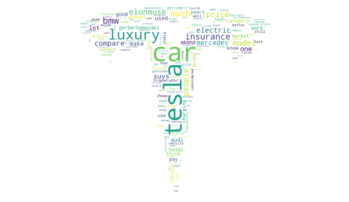

In [66]:
# most common twet content keywords for a specific brand
# https://amueller.github.io/word_cloud/auto_examples/single_word.html#sphx-glr-auto-examples-single-word-py
# https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html#wordcloud.WordCloud #Q8
b = 'tesla'

mask = np.array(Image.open(r"C:\Users\Kae\tesla.jpeg"))

wc = WordCloud(mask=mask, background_color='white', width=mask.shape[1], height=mask.shape[0], max_font_size=110, collocations=False).generate(brand_all_text(b))
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()

In [67]:
# for alternative visualizations, extract the keyword counts
kwords = WordCloud().process_text(brand_all_text(b))
# transform that dictionary into a pandas DataFrame
df_kwords = pd.DataFrame(list(kwords.items()), columns=['keyword', 'count']).set_index('keyword')
# Showing the table with the top-20 keywords
df_kwords.sort_values(by='count', ascending=False).head(20)

,count
keyword,
tesla,73
car,44
luxury car,39
luxury,25
model,13
people,12
electric,11
cars suvs,10
bmw luxury,10


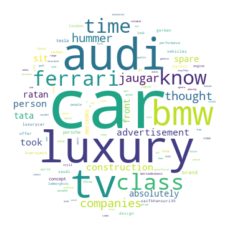

In [68]:
# most common twet content keywords for a specific brand
# https://amueller.github.io/word_cloud/auto_examples/single_word.html#sphx-glr-auto-examples-single-word-py
# https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html#wordcloud.WordCloud #Q8
b = 'audi'
mask = np.array(Image.open(r"C:\Users\Kae\circle.jpeg"))

wc = WordCloud(mask=mask, background_color='white', width=mask.shape[1], height=mask.shape[0], max_font_size=110, collocations=False).generate(brand_all_text(b))
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()

In [69]:
# for alternative visualizations, extract the keyword counts
kwords = WordCloud().process_text(brand_all_text(b))
# transform that dictionary into a pandas DataFrame
df_kwords = pd.DataFrame(list(kwords.items()), columns=['keyword', 'count']).set_index('keyword')
# Showing the table with the top-20 keywords
df_kwords.sort_values(by='count', ascending=False).head(20)

,count
keyword,
bmw audi,42
luxury class,39
spare time,37
companies know,37
front tv,37
sit front,37
time sit,37
absolutely spare,37
car absolutely,37


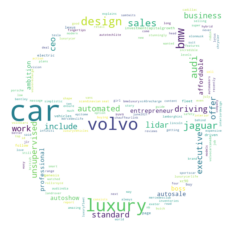

In [70]:
# most common twet content keywords for a specific brand
# https://amueller.github.io/word_cloud/auto_examples/single_word.html#sphx-glr-auto-examples-single-word-py
# https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html#wordcloud.WordCloud #Q8
b = 'volvo'
mask = np.array(Image.open(r"C:\Users\Kae\volvo.jpeg"))

wc = WordCloud(mask=mask, background_color='white', width=mask.shape[1], height=mask.shape[0], max_font_size=110, collocations=False).generate(brand_all_text(b))
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()

In [71]:
# for alternative visualizations, extract the keyword counts
kwords = WordCloud().process_text(brand_all_text(b))
# transform that dictionary into a pandas DataFrame
df_kwords = pd.DataFrame(list(kwords.items()), columns=['keyword', 'count']).set_index('keyword')
# Showing the table with the top-20 keywords
df_kwords.sort_values(by='count', ascending=False).head(20)

,count
keyword,
car,14
volvo,13
luxury,13
design,4
bmw,4
audi,3
jaguar,3
sales,3
xc90,2


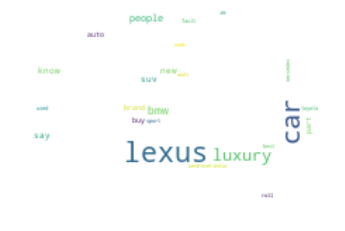

In [72]:
# most common twet content keywords for a specific brand
# https://amueller.github.io/word_cloud/auto_examples/single_word.html#sphx-glr-auto-examples-single-word-py
# https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html#wordcloud.WordCloud #Q8
b = 'lexus'
mask = np.array(Image.open(r"C:\Users\Kae\lexus.jpeg"))

wc = WordCloud(mask=mask, background_color='white', width=mask.shape[1], height=mask.shape[0], max_font_size=110, collocations=False).generate(brand_all_text(b))
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()

In [73]:
# for alternative visualizations, extract the keyword counts
kwords = WordCloud().process_text(brand_all_text(b))
# transform that dictionary into a pandas DataFrame
df_kwords = pd.DataFrame(list(kwords.items()), columns=['keyword', 'count']).set_index('keyword')
# Showing the table with the top-20 keywords
df_kwords.sort_values(by='count', ascending=False).head(20)

,count
keyword,
lexus,30
car,16
luxury car,12
luxury,9
bmw,8
people,6
new,5
suv,5
know,5


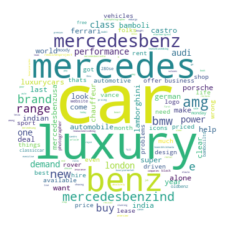

In [74]:
# most common twet content keywords for a specific brand
# https://amueller.github.io/word_cloud/auto_examples/single_word.html#sphx-glr-auto-examples-single-word-py
# https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html#wordcloud.WordCloud #Q8
b = 'benz'
mask = np.array(Image.open(r"C:\Users\Kae\circle.jpeg"))

wc = WordCloud(mask=mask, background_color='white', width=mask.shape[1], height=mask.shape[0], max_font_size=110, collocations=False).generate(brand_all_text(b))
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()

In [75]:
# for alternative visualizations, extract the keyword counts
kwords = WordCloud().process_text(brand_all_text(b))
# transform that dictionary into a pandas DataFrame
df_kwords = pd.DataFrame(list(kwords.items()), columns=['keyword', 'count']).set_index('keyword')
# Showing the table with the top-20 keywords
df_kwords.sort_values(by='count', ascending=False).head(20)

,count
keyword,
car,41
luxury car,22
luxury,19
mercedesbenz,13
mercedes,13
benz,11
mercedes benz,8
mercedesbenzind,8
new,7


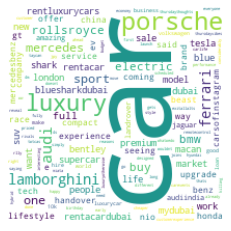

In [76]:
# most common twet content keywords for a specific brand
# https://amueller.github.io/word_cloud/auto_examples/single_word.html#sphx-glr-auto-examples-single-word-py
# https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html#wordcloud.WordCloud #Q8
b = 'porsche'
mask = np.array(Image.open(r"C:\Users\Kae\porsche.jpeg"))

wc = WordCloud(mask=mask, background_color='white', width=mask.shape[1], height=mask.shape[0], max_font_size=110, collocations=False).generate(brand_all_text(b))
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()

In [77]:
# for alternative visualizations, extract the keyword counts
kwords = WordCloud().process_text(brand_all_text(b))
# transform that dictionary into a pandas DataFrame
df_kwords = pd.DataFrame(list(kwords.items()), columns=['keyword', 'count']).set_index('keyword')
# Showing the table with the top-20 keywords
df_kwords.sort_values(by='count', ascending=False).head(20)

,count
keyword,
porsche,34
car,33
luxury,16
luxury car,12
audi,10
lamborghini,8
ferrari,8
one,6
mercedes,6


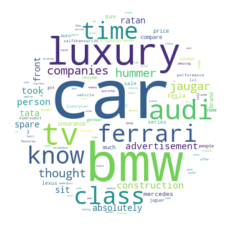

In [78]:
# most common twet content keywords for a specific brand
# https://amueller.github.io/word_cloud/auto_examples/single_word.html#sphx-glr-auto-examples-single-word-py
# https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html#wordcloud.WordCloud #Q8
b = 'bmw'
mask = np.array(Image.open(r"C:\Users\Kae\circle.jpeg"))

wc = WordCloud(mask=mask, background_color='white', width=mask.shape[1], height=mask.shape[0], max_font_size=110, collocations=False).generate(brand_all_text(b))
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()

In [79]:
# for alternative visualizations, extract the keyword counts
kwords = WordCloud().process_text(brand_all_text(b))
# transform that dictionary into a pandas DataFrame
df_kwords = pd.DataFrame(list(kwords.items()), columns=['keyword', 'count']).set_index('keyword')
# Showing the table with the top-20 keywords
df_kwords.sort_values(by='count', ascending=False).head(20)

,count
keyword,
bmw audi,42
luxury car,38
hummer bmw,37
companies know,37
front tv,37
sit front,37
time sit,37
spare time,37
absolutely spare,37
